In [17]:
import pandas as pd

train = pd.read_csv("./data/train.csv")
test_x = pd.read_csv("./data/test.csv")
test_y = pd.read_csv("./data/sample_submission.csv")

test = pd.merge(test_x, test_y, on='Id')

all_data = (train+test).drop("Id", axis=1)

with open("./data/data_description.txt", "r", encoding="utf8") as file:
    desc = file.read()

In [19]:
cols = all_data.columns
cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [20]:
num_cols = all_data.describe().columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
cat_cols = set(cols) - set(num_cols)
print(cat_cols)

{'Foundation', 'ExterCond', 'BsmtFinType2', 'RoofMatl', 'Alley', 'RoofStyle', 'Exterior1st', 'MSZoning', 'Utilities', 'BsmtCond', 'LotConfig', 'GarageFinish', 'HeatingQC', 'LandSlope', 'Neighborhood', 'GarageType', 'MasVnrType', 'GarageQual', 'PavedDrive', 'LotShape', 'Exterior2nd', 'BldgType', 'KitchenQual', 'PoolQC', 'Functional', 'Condition1', 'FireplaceQu', 'Heating', 'SaleType', 'SaleCondition', 'Street', 'Condition2', 'BsmtQual', 'CentralAir', 'ExterQual', 'LandContour', 'MiscFeature', 'BsmtExposure', 'HouseStyle', 'Electrical', 'BsmtFinType1', 'Fence', 'GarageCond'}


In [22]:
print(desc)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [23]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,80.0,RLRH,145.0,20072.0,PavePave,NaN,RegReg,LvlLvl,AllPubAllPub,InsideInside,...,0.0,NaN,NaN,NaN,0.0,8.0,4018.0,WDWD,NormalNormal,377777.052498
1,40.0,RLRL,161.0,23867.0,PavePave,NaN,RegIR1,LvlLvl,AllPubAllPub,FR2Corner,...,0.0,NaN,NaN,NaN,12500.0,11.0,4017.0,WDWD,NormalNormal,369258.393989
2,120.0,RLRL,142.0,25080.0,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,InsideInside,...,0.0,NaN,NaN,NaN,0.0,12.0,4018.0,WDWD,NormalNormal,407083.683570
3,130.0,RLRL,138.0,19528.0,PavePave,NaN,IR1IR1,LvlLvl,AllPubAllPub,CornerInside,...,0.0,NaN,NaN,NaN,0.0,8.0,4016.0,WDWD,AbnormlNormal,319317.477511
4,180.0,RLRL,127.0,19265.0,PavePave,NaN,IR1IR1,LvlHLS,AllPubAllPub,FR2Inside,...,0.0,NaN,NaN,NaN,0.0,13.0,4018.0,WDWD,NormalNormal,400730.079977


In [24]:
all_data[num_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,80.0,145.0,20072.0,12.0,11.0,3964.0,3964.0,196.0,1174.0,144.0,...,140.0,61.0,0.0,0.0,120.0,0.0,0.0,8.0,4018.0,377777.052498
1,40.0,161.0,23867.0,12.0,14.0,3934.0,3934.0,108.0,1901.0,0.0,...,691.0,36.0,0.0,0.0,0.0,0.0,12500.0,11.0,4017.0,369258.393989
2,120.0,142.0,25080.0,12.0,10.0,3998.0,4000.0,162.0,1277.0,0.0,...,212.0,76.0,0.0,0.0,0.0,0.0,0.0,12.0,4018.0,407083.683570
3,130.0,138.0,19528.0,13.0,11.0,3913.0,3968.0,20.0,818.0,0.0,...,360.0,71.0,272.0,0.0,0.0,0.0,0.0,8.0,4016.0,319317.477511
4,180.0,127.0,19265.0,16.0,10.0,3992.0,3992.0,350.0,918.0,0.0,...,192.0,166.0,0.0,0.0,144.0,0.0,0.0,13.0,4018.0,400730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,220.0,83.0,9811.0,10.0,10.0,3969.0,3970.0,0.0,252.0,0.0,...,0.0,64.0,0.0,0.0,0.0,0.0,0.0,12.0,4013.0,339788.778231
1456,40.0,245.0,33175.0,11.0,13.0,3938.0,3984.0,119.0,2014.0,163.0,...,823.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,4016.0,429222.423400
1457,155.0,128.0,19483.0,12.0,14.0,3933.0,3998.0,0.0,612.0,0.0,...,80.0,92.0,0.0,0.0,0.0,0.0,3200.0,12.0,4016.0,451424.279659
1458,80.0,142.0,19344.0,12.0,11.0,3943.0,3990.0,94.0,807.0,1029.0,...,556.0,48.0,112.0,0.0,0.0,0.0,0.0,15.0,4016.0,329866.866657


In [56]:
#all_data.PoolArea.describe(20)


# work with (logarithmic): BsmtFinSF2, MasVnrArea, 2ndFlrSF, PoolArea
# work with (to 2016): YearRemodAdd

# remove temp: 'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'

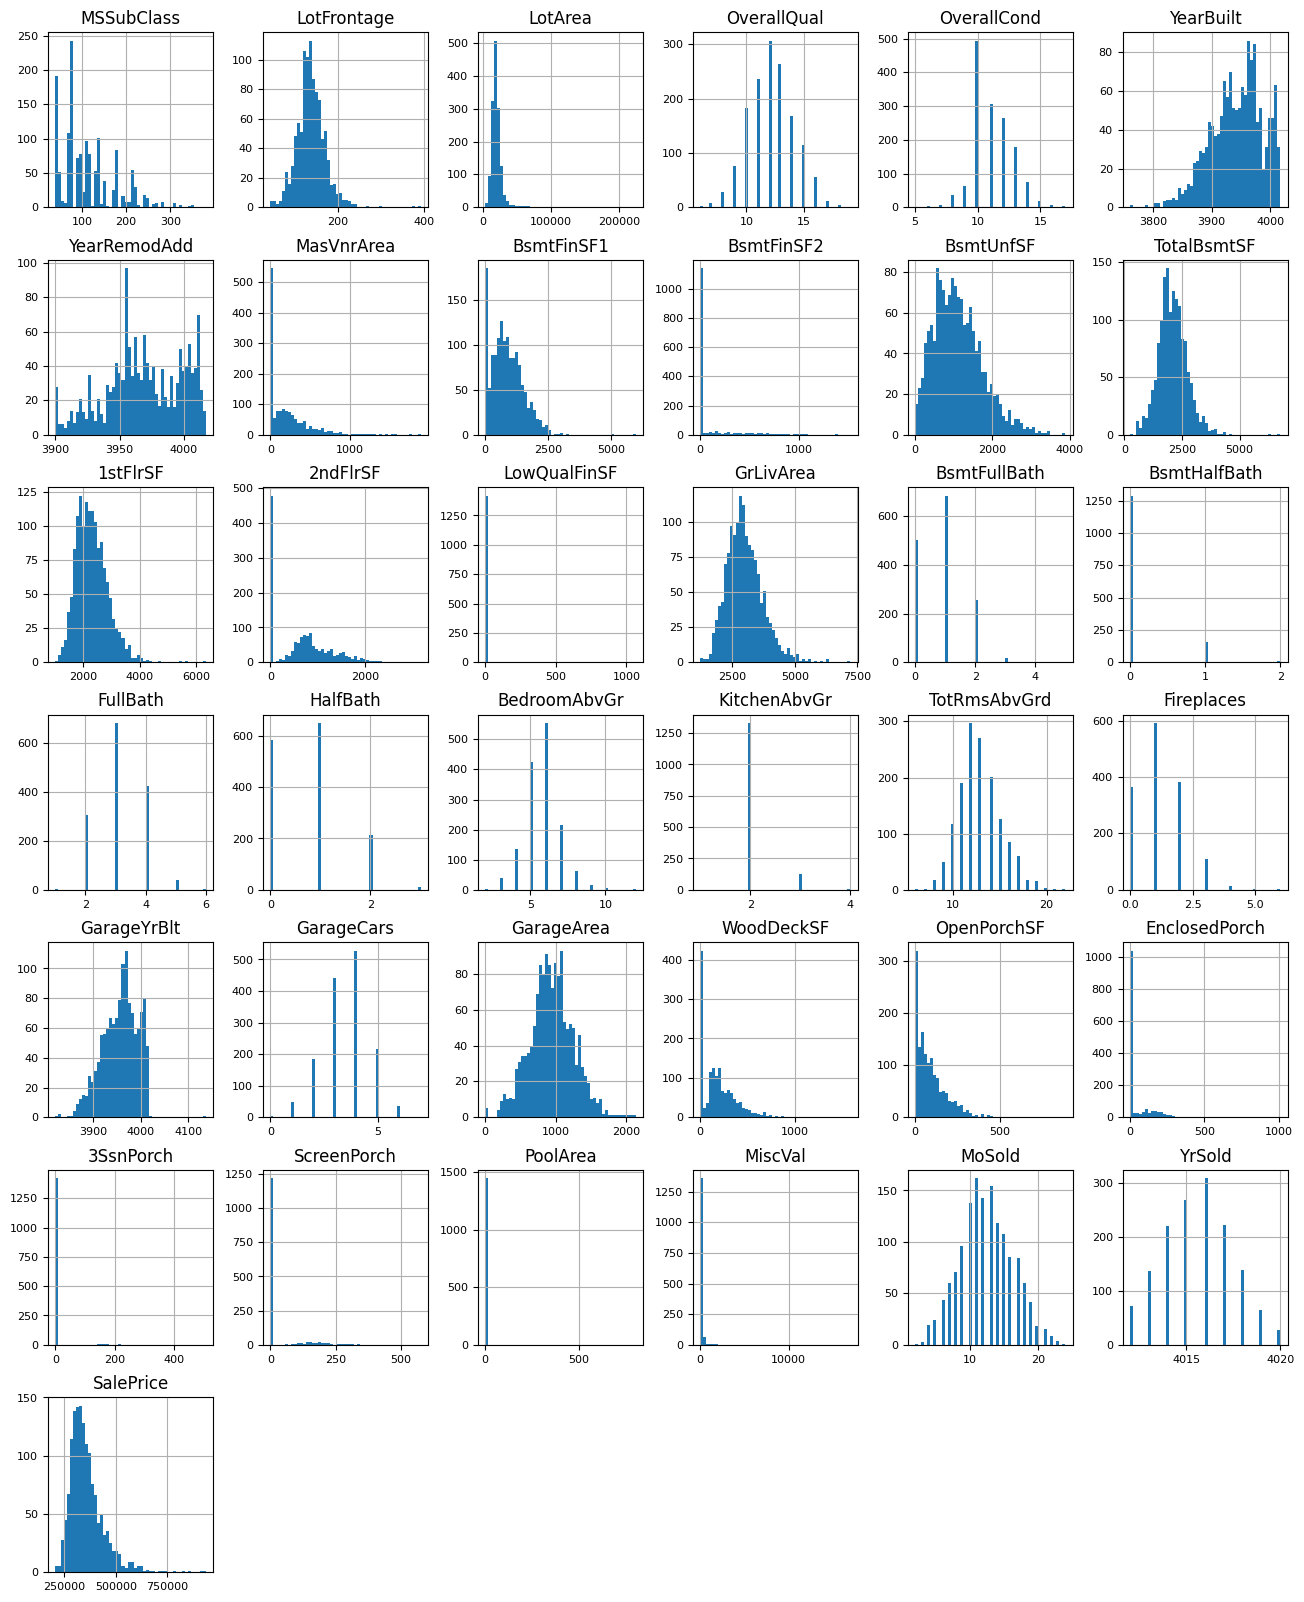

In [48]:
all_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [55]:
for col in all_data[num_cols].columns:
    print(col, '\n', all_data.__getattr__(col).describe(), '\n')

MSSubClass 
 count    1459.000000
mean      114.300891
std        61.009101
min        40.000000
25%        70.000000
50%       100.000000
75%       140.000000
max       380.000000
Name: MSSubClass, dtype: float64 

LotFrontage 
 count    1010.000000
mean      138.308911
std        33.382096
min        42.000000
25%       120.000000
50%       137.000000
75%       156.750000
max       393.000000
Name: LotFrontage, dtype: float64 

LotArea 
 count      1459.000000
mean      20336.386566
std       11116.564436
min        3003.000000
25%       15701.000000
50%       18880.000000
75%       22662.000000
max      224727.000000
Name: LotArea, dtype: float64 

OverallQual 
 count    1459.000000
mean       12.178890
std         1.975208
min         6.000000
25%        11.000000
50%        12.000000
75%        13.000000
max        19.000000
Name: OverallQual, dtype: float64 

OverallCond 
 count    1459.000000
mean       11.128855
std         1.561667
min         5.000000
25%        10.000000
50%

The lack of variability means that OverallCond doesn't provide much information (e.g., if most values are the same), it might not be a useful feature.

In [25]:
all_data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   LotFrontage    1010 non-null   float64
 2   LotArea        1459 non-null   float64
 3   OverallQual    1459 non-null   float64
 4   OverallCond    1459 non-null   float64
 5   YearBuilt      1459 non-null   float64
 6   YearRemodAdd   1459 non-null   float64
 7   MasVnrArea     1436 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   float64
 13  2ndFlrSF       1459 non-null   float64
 14  LowQualFinSF   1459 non-null   float64
 15  GrLivArea      1459 non-null   float64
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath     

In [26]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659


### Distribution for all the numerical features.

Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale